In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
file_path = 'Students _Performance _Prediction.csv'
df = pd.read_csv(file_path)

In [7]:
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

First 5 rows:
  Student_ID Student_Age     Sex High_School_Type Scholarship Additional_Work  \
0   STUDENT1       19-22    Male            Other         50%             Yes   
1   STUDENT2       19-22    Male            Other         50%             Yes   
2   STUDENT3       19-22    Male            State         50%              No   
3   STUDENT4          18  Female          Private         50%             Yes   
4   STUDENT5       19-22    Male          Private         50%              No   

  Sports_activity Transportation  Weekly_Study_Hours Attendance Reading Notes  \
0              No        Private                   0     Always     Yes   Yes   
1              No        Private                   0     Always     Yes    No   
2              No        Private                   2      Never      No    No   
3              No            Bus                   2     Always      No   Yes   
4              No            Bus                  12     Always     Yes    No   

  Listening_

In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64


In [11]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [15]:
X = df.drop('Sex', axis=1)  # Replace 'Performance' with your target column name
y = df['Sex']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [25]:
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression ---
Accuracy: 0.5862068965517241
[[ 6  9]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.55      0.79      0.65        14

    accuracy                           0.59        29
   macro avg       0.61      0.59      0.57        29
weighted avg       0.61      0.59      0.57        29



In [27]:
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


--- Random Forest ---
Accuracy: 0.7586206896551724
[[10  5]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.71      0.86      0.77        14

    accuracy                           0.76        29
   macro avg       0.77      0.76      0.76        29
weighted avg       0.77      0.76      0.76        29



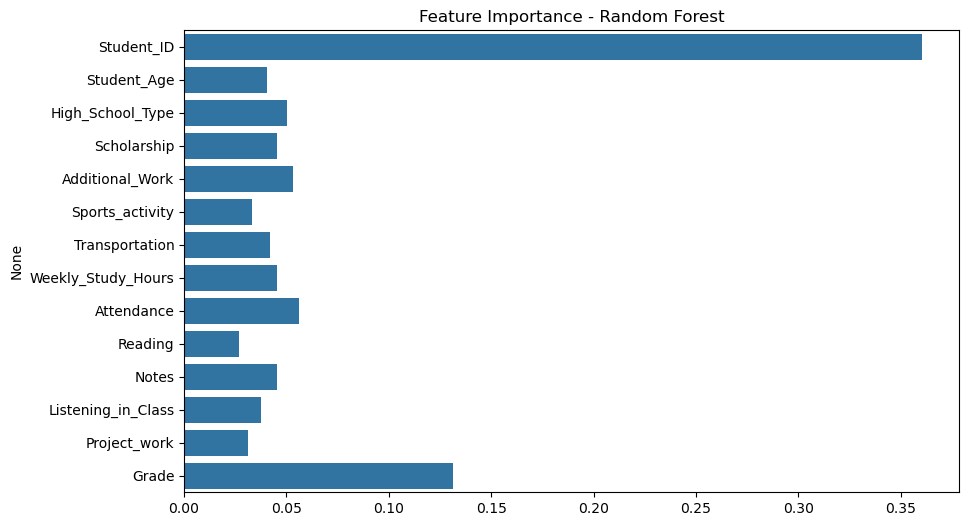

In [31]:
importances = rf.feature_importances_
features = df.drop('Sex', axis=1).columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()